In [ ]:
#여유, 공간, 안전 구역 제공
#지도 학습 모델

(10,)
(10, 1)
(10, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


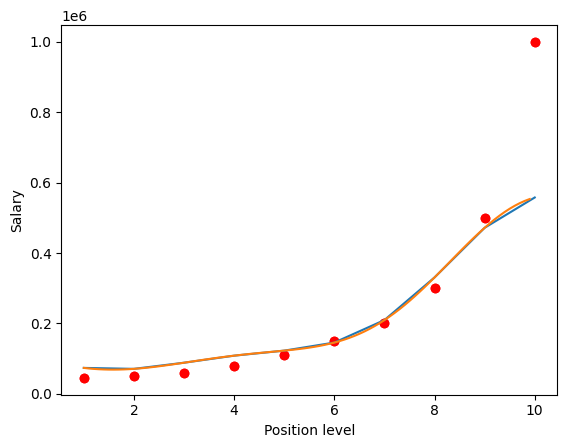

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/drive/MyDrive/유데미/study/section6_회귀/4_서포트 벡터 머신(SVR)/Position_Salaries.csv")
print(dataset)
X = dataset.iloc[:, 1:-1].values #values = 데이터를 넘파이 배열로 추출
y = dataset.iloc[:, -1].values
print(y.shape)
# y를 2차원 배열 형식으로 바꾼다. 표준화는 입력 값으로 특수한 형식을 원한다 = 2차원 배열
#fit_transform()은 2차원 배열 입력
y = y.reshape(len(y), 1) #행의 개수, 열 개수
print(X.shape)
print(y.shape)

#svr 모델에는 특성에 관련된 명시적인 종속 변수의 방정식이 없어서 feature scaling해야한다
#높은 특성 값으로 보상할 수 있는 계수들이 있는 선형 회귀 모델은 특성 스케일링을 적용할 필요가 없다.
#단순, 다중 선형 회귀, 다항 회귀의 경우에도 필요 없다
#종속 변수 y와 특성 x 사이에 묵시적인 방정식이나 관계가 있는 경우 필요

#level과 salary 값 차이가 너무 크기 때문에 feature scaling 필요
#종속 변수가 0이나 1 같은 이진 값을 가진 경우 / 원핫 인코딩에서 나오는 가변수에 적용하지 않는다. => 이미 적절한 범위
#트레인 / 테스트 분할 -> 분할하고 스케일링 한다.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #직위 수준의 평규과 표준편차 계산
sc_y = StandardScaler() #연본의 평균과 표준편차 계산
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X, y)

sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

X_plt = sc_X.inverse_transform(X)
y_plt = sc_y.inverse_transform(y)

plt.scatter(X_plt, y_plt, color='red')
plt.plot(X_plt, sc_y.inverse_transform(svr.predict(X).reshape(-1, 1)))#X가 이미 스케일링돼 있다
plt.xlabel("Position level")
plt.ylabel("Salary")


X_grid = np.arange(min(X_plt), max(X_plt), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_plt, y_plt, color='red') #svr예측으로 교체
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid)).reshape(-1, 1)))